# Python을 이용한 통계적 추정과 검정 & 상관, 회귀분석 실습 과제(5/12, Day 3)
### B2_김지현

In [4]:
# 필요 모듈 임포트
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportions_ztest

## 실습 1 (평균 검정_모집단의 표준편차를 모르는 경우)
### 추론 통계 (파이썬 코딩 및 결과 정리)
__고객서비스센터의 고객만족도 평균은 78.0이다. 개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다. 개선활동이 만족도를 변화시켰는가? (α = 0.05)__

In [2]:
# 데이터프레임 생성
df = pd.DataFrame({'Sample': [85, 79, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})

# 정규성 검정
shapiro(df)

ShapiroResult(statistic=0.8473217487335205, pvalue=0.0539751797914505)

- 샤피로 윌크 테스트를 통해 정규성을 검정한 결과, __p-value 값이 유의수준 0.05보다 높기 때문에 '해당 데이터는 정규성을 가진다'는 귀무가설(H0)을 채택__한다.
- 즉, __해당 데이터는 정규성을 가진다.__

In [5]:
# 1-sample t-test
t_result = stats.ttest_1samp(df, 78.0)

# 1-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 1-Sample t-test의 t값 p값 출력
print('1-sample t-test')
print('t통계량: {}'.format(t))
print('p-value: {}'.format(p))

1-sample t-test
t통계량: [3.379]
p-value: [0.008]


### 결과 해석
- 해당 문제 요건을 분석하면, __표본의 개수는 10개이며, 추정한 모평균은 78__이다.
- 모표준편차 즉 __모집단의 특성을 모르는 상황에서 평균을 추정__하고자 하기 때문에, __t 분포를 이용하여 검정__을 한다.
- 따라서 __One-Sample t-test__을 이용하여 검정을 실시한다.
- 가설 수립 및 검정 절차는 다음과 같이 정의하였다.
    - __가설 수립__:
        - __H0 (대립가설): μ = 78.0__
        - __H1 (귀무가설): μ ≠ 78.0__
    - __유의수준 설정__
        - __α = 0.05__ (신뢰수준 0.95)
    - __검정통계량과 p-value 계산__
        - __검정통계량: 3.379__
        - __p-value: 0.008__
    - __양측검정__ 수행
- __결론__: __p-value가 유의수준보다 작다(0.008 < 0.05)__. 다시 말해 검정통계량이 기각역에 찍혔으므로 __H0 귀무가설을 기각하고 H1 대립가설을 채택__한다.

### 종합 결론
- 유의수준 5%에서 검정한 결과, __p-value 값이 유의하게 낮았으므로 고객서비스센터의 개선활동이 고객만족도 변화를 시켰다__고 말할 수 있다.

### Insight
- 고객서비스센터에서 고객 만족도를 올리기 위해 __개선활동을 수행한 결과, 고객의 만족도 평균이 상승했다__는 유의미한 결론을 얻을 수 있었다.
- 따라서 __구체적으로 어떤 요인이 개선의 원인이 되었는지를 찾아내는 과정__이 추후 수행되어야 하며, 이와 더불어 __고객이 기존에 서비스의 어느 부분에서 만족하지 못했는지를 찾아내는 과정이 수반__되어야 할 것이다.
- 더불어 __개선활동이 통계적으로 유의미했기 때문에, 개선활동에 대한 업무과정을 표준화하여 이후 반복적으로 활동을 시행__할 수 있다.

-----

## 실습 2 (2 Sample t-test)
### 추론통계 (파이썬 코딩 및 결과 정리)
__제품을 A공급자와 B공급자로부터 제품을 받아 두께를 특정해서 다음의 데이터를 얻었다. 공급자 간에 모평균에 차이가 있다고 할 수 있는가? (유의수준 α = 0.05)__

In [7]:
# df_A, df_B를 직접 입력
df_A = pd.DataFrame({'Sample_A': [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344]})
df_B = pd.DataFrame({'Sample_B': [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

# 2-Sample t-test
t_result = stats.ttest_ind(df_A, df_B)

# 정규성 검정
print(shapiro(df_A))
print(shapiro(df_B))

ShapiroResult(statistic=0.8425756096839905, pvalue=0.08004552870988846)
ShapiroResult(statistic=0.7734811902046204, pvalue=0.014793740585446358)


- 샤피로 윌크 테스트를 통해 정규성을 검정한 결과, __df_A의 p-value 값은 유의수준 0.05보다 높기 때문에 정규성이 있다는 귀무가설을 채택한다.__ 반면, __df_B의 p-value 값은 유의수준 0.05보다 작기 때문에 정규성이 있다는 귀무가설을 기각하고 정규성이 없다는 대립가설을 채택해야 한다.__
- 다시 말해, __A 공급자가 제공한 제품의 두께 데이터는 정규성을 가지지만, B 공급자가 제공한 제품의 두께 데이터는 정규성을 가지지 않는다.__
- 그러나 해당 문제 상황에서는 데이터 관측치 수가 충분히 많다(표본 개수가 30개 이상이다)는 상황을 가정하고 __중심극한정리에 의해 데이터의 정규성을 가정하고 문제를 풀어볼 것__이다.

In [8]:
# 등분산성 검정
print(stats.levene(df_A['Sample_A'], df_B['Sample_B']))

LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)


- 등분산성을 검증한 결과, __p-value 값이 유의수준 0.05보다 유의하게 높게 나와 등분산성을 가진다(두 데이터의 분산이 같다)는 H0 귀무가설을 채택한다__
- 즉, __A 공급자가 제공한 제품의 두께 데이터의 변동성과 B 공급자가 제공한 제품의 두께 데이터의 변동성은 같다.__

In [10]:
# 2-Sample t-test 시행
t_result = stats.ttest_ind(df_A, df_B, equal_var = True)

# 2-Sample t-test의 t값, p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-Sample t-test의 t값 p값 출력
print('2-Sample t-test')
print('t:{}'.format(t))
print('p-value: {}'.format(p))

2-Sample t-test
t:[1.7]
p-value: [0.111]


### 결과 해석
- 해당 문제 요건을 분석하면, __A 공급자, B 공급자 각각 두 집단에 대한 평균 차이를 검정해야 한다.__
- 이때 두 확률표본은 두 모집단으로부터 각기 독립적으로 관측되었다. 따라서 __독립 2표본 검정__을 사용한다.
- 이때 독립적인 2 Sample Test는 데이터가 3가지 가정을 만족해야 하는데, __(1) 각 데이터는 독립적이고 랜덤으로 샘플링 되어야 한다__. __(2) 각 데이터는 두 그룹이 각각 정규분포를 이룬다__. __(3) 각 그룹의 분산은 같다__가 바로 그것이다.
- 이에 따라 가설 수립 및 검정 절차를 다음과 같이 정의한다.
    - __정규성 검정__
    - __등분산성 검정__
    - __가설 수립__
        - __H0 귀무가설: 두 집단의 평균은 동일하다. (= 두 집단의 평균 차는 0이다)__
        - __H1 대립가설: 두 집단의 평균은 다르다. (= 두 집단의 평균 차는 0이 아니다)__
    - __유의수준 설정__
        - __α = 0.05__ (신뢰수준 0.95)
    - __검정통계량과 p-value 계산__
        - __검정통계량: 1.7__
        - __p-value: 0.111__
    - __양측검정 수행__

### 종합 결론
- 유의수준 5%에서 검정한 결과, __p-value 값은 유의수준 0.05보다 큰 값을 가지기 때문에 두 집단의 평균이 같다는 귀무가설을 기각할 수 없다.__
- 즉, A 공급자와 B 공급자가 제공한 각 제품의 무게 평균에는 차이가 없다.

### Insight
- A 공급자와 B 공급자 각각 제품의 평균에 차이가 없다는 것은, 즉 __A 공급자나 B 공급자 제품에 유의미한 차별점이 없다__는 의미로 해석할 수 있다.
- 즉, 제품의 두께가 비즈니스적으로 큰 의미가 없다면 __둘 중 하나의 공급자만을 선택할 수 있고, 이로써 공급업체를 늘림으로써 발생하는 비용을 줄일 수 있을 것__이다.
- 이때 공급자를 선택하는 기준은 여러가지가 될 수 있지만, __비용발생을 최소화시킬 수 있는 방향으로 Supply Chain을 재구성__할 여지가 있다.

-------

## 실습 3 (Paired t-test)
### 추론 통계(파이썬 코딩 및 결과 정리)
__회사원 10명에 대해, 학원을 가기 전의 영어점수와 학원 수강 후에 영어점수가 짝을 이루고 있다. 회사원들의 성적은 학원 가기 전후에 대해 차이가 있는지 검정하라.__

In [11]:
# df 직접 입력
df_Before = pd.DataFrame({'Before': [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df_After = pd.DataFrame({'After': [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

# Paired t-test
t_result = stats.ttest_rel(df_Before, df_After)

# Paired t-test t값 p값
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print('2-Sample t-test')
print('t:{}'.format(t))
print('p-value: {}'.format(p))

2-Sample t-test
t:[-2.266]
p-value: [0.05]


### 결과 해석
- 해당 문제 요건을 분석하면, __표본의 개수는 10이며, 이때 같은 회사원 집단의 영어점수가 달라졌는지 비교하여 차이가 있는 검정해야 한다.__
- 하나의 단위(점수)의 차이를 검정해야 하기 때문에, __Paired t-test__를 사용한다.
- 이때 __Paired t-test는 다음의 가정을 만족__해야 한다.
    - 종속변수는 연속형 변수여야 한다.
    - 변수는 서로 독립적이다.
    - 종속변수는 대략적으로 정규 분포를 따라야 한다.
    - 종속변수는 이상치를 포함하지 않아야 한다.
- 이에 따라 가설 수립 및 검정 절차를 다음과 같이 정의한다.
    - __가설 수립__
        - __H0 귀무가설: 집단 전후 평균이 0이다. (= 전/후 평균 차이가 없다)__
        - __H1 대립가설: 집단 전후 평균이 0이 아니다. (= 전/후 평균 차이가 있다)__
    - __유의수준 설정__
        - __α = 0.05__ (신뢰수준 0.95)
    - __검정통계량과 p-value 계산__
        - __검정통계량: -2.266__
        - __p-value: 0.05__
    - __양측검정 수행__


### 종합 결론
- __p-value 값이 0.05로 유의수준 값과 같지만, 새로운 가설에 대한 해석을 진행하고자 H0 귀무가설을 기각하고 H1 대립가설을 채택__한다.
- 즉, __유의수준 5%에서 검정한 결과, p-value 값이 유의수준과 같기에 회사원 10명은 학원에서 수업을 수강한 이후 영어점수에 유의미한 변화를 보였다__고 할 수 있다.
- 이때 t 검정통계량이 -2.266으로, (이전의 평균 - 이후의 평균)의 값이 음수이기에 __학원 수강 이후의 평균이 이전의 평균보다 높아졌다는 것을 알 수 있다__.
    - 다시 말해, __학원을 수강한 이후 사람들이 점수가 평균적으로 상승했다는 결론을 도출__할 수 있다.

### Insight
- 위의 결과를 종합하여, 해당 학원에서는 __학원 수강생들의 점수 상승폭을 기반으로 경영전략을 새롭게 고안해낼 여지__가 있다.
    - 이를 테면 __회사원들을 대상으로 하는(타겟 소비자군: 회사원) 야간/주말반 강의를 추가 개설하는 데 있어(새로운 사업전략), 회사원들의 영어점수가 유의미하게 상승했다는 결과를 추가 개설의 근거자료로 활용__할 수 있다(비용을 투자할 가치가 있다는 근거).
    - 혹은 __마케팅 전략을 기획함에 있어, 수강생들의 점수 상승률을 강조하여 타겟 소비자군(회사원)들을 끌어모으는 유인전략__을 세울 수 있다.

--------

## 실습 4 (1 Proportion Test)
### 추론 통계 (파이썬 코딩 및 결과 정리)
__동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며 뒷면이 60번 나왔다. 이 동전은 정상인가를 유의수준 α = 0.05로써 검정하라. 정상적인 동전을 던질 때, 앞면이 나올 확률은 50%이다.__

In [13]:
# 변수 선언
count = 40
n_obs = 100
value = 0.5

# 1 Proportion test 실행
stat, pval = proportions_ztest(count, n_obs, value)

# 1 Proportion test 결과 출력
print('1 Proportion Test')
print('z: {0: 0.3f}'.format(stat))
print('p: {0: 0.3f}'.format(pval))

1 Proportion Test
z: -2.041
p:  0.041


### 결과 해석
- 해당 문제 요건을 분석하면, __모비율이 0.5일 때 표본비율 0.4가 통계적으로 유의미한 차이를 가지는지(차이를 가지는 경우 정상이 아니라고 해석)를 판단__해야 한다.
- 따라서 __한 집단의 비율이 특정 비율과 같은지를 검정하는 도구인 1 Proportion Test를 진행__한다.
- 이때 __Paired t-test는 다음의 가정을 만족__해야 한다.
- 이에 따라 가설 수립 및 검정 절차를 다음과 같이 정의한다.
    - __가설 수립__
        - __H0 귀무가설: 모집단 비율이 귀무가설에서의 비율과 같다. (p = 0.5)__
        - __H1 대립가설: 모집단 비율이 귀무가설에서의 비율과 다르다. (p ≠ 0.5)__
    - __유의수준 설정__
        - __α = 0.05__ (신뢰수준 0.95)
    - __검정통계량과 p-value 계산__
        - __검정통계량: -2.041__
        - __p-value: 0.041__

### 종합 결론
- __p-value 값이 유의수준 0.05보다 작기에, 귀무가설 H0을 기각하고 대립가설 H1을 채택__한다.
- 즉, 100번의 시행횟수를 통해 동전 던지기를 했을 때, __앞면이 나오는 확률 0.4는 모비율 0.5와 통계적으로 차이가 있다는 결과__가 나왔다.
- 다시 말해 비율의 절대적 값이 다르고, 더불어 __통계적으로 유의미한 차이가 있다고 판단__한다. 결국 __해당 동전은 정상이 아니라는 결론을 도출__하였다.

---------

## 실습 5 (2 Proportion Test)
### 추론 통계 (파이썬 코딩 및 결과 정리)
__동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과가 아래와 같다. 두 공정의 불량률이 같다고 할 수 있는가? (유의수준 0.05)__
- 공장 A: 표본 개수 = 1200, X1 = 14
- 공장 B: 표본 개수 = 1200, X2 = 5

In [68]:
# 변수 선언
count = np.array([14, 5])
nobs = np.array([1200, 1200])

# Proportion Test 실행
stat, pval = proportions_ztest(count, nobs)

# 2 Proportion Test 결과 출력
print('2 Proportion test')
print('z:{0:0.3f}'.format(stat))
print('p-value: {0:0.3f}'.format(pval))

2 Proportion test
z:2.073
p-value: 0.038


### 결과 해석
- 해당 문제 요건을 분석하면, __두 집단(공장 A, 공장 B) 간의 불량률에 차이가 있는지 같은지를 검정__해야 한다.
- 따라서 __두 집단의 비율이 같은 지를 검정하는 도구인 2 Proportion Test를 진행__한다.
- 이때 __Paired t-test는 다음의 가정을 만족__해야 한다.
- 이에 따라 가설 수립 및 검정 절차를 다음과 같이 정의한다.
    - __가설 수립__
        - __H0 귀무가설: 두 집단의 비율은 같다.__
        - __H1 대립가설: 두 집단의 비율은 다르다.__
    - __유의수준 설정__
        - __α = 0.05__ (신뢰수준 0.95)
    - __검정통계량과 p-value 계산__
        - __검정통계량: 2.073__
        - __p-value: 0.013__

### 종합 결론
- __p-vlaue 값이 유의수준 0.5보다 낮기 때문에, 귀무가설 H0을 기각하고 대립가설 H1을 채택__한다.
- 즉, __두 공장 A, B에서 측정한 불량률은 통계적으로 다르다는 결과를 도출__하였다.

### Insight
- 공장 A의 불량률은 약 0.0117이고, 공장 B의 불량률은 약 0.0042이다.
- 따라서 __공장 B의 불량률이 공장 A보다 낮다__는 결과를 가지고 다음 두 가지의 인사이트를 도출해낼 수 있다.
    - 첫째, __소비자의 관점에서, 고객은 해당 제품을 구매해야 한다면 공장 B에서 생산된 제품을 구매__해야 할 것이다.
    - 둘째, __생산자의 관점에서, 공장 A의 경영진은 공장 B의 생산방식, 인력운영 방식, 작업 방식 등을 벤치마킹하여 해당 제품에 대한 불량률을 어떻게 낮출 수 있을 것인지를 고민__해야 한다.

---------

## 실습 6 (카이제곱 검정, Chi-square Test)
### 추론 통계 (파이썬 코딩 및 결과 정리)
__노트북 컴퓨터의 6가지 제품(A, B, C, D, E, F)에 대하여 7가지 제품의 이미지를 중복 선택할 수 있도록 32명의 소비자를 대상으로 설문 조사한 Table이다. 각 제품에 대해 이미지에 대해 차이가 있겠는가? (유의수준 0.05)__

In [15]:
# 데이터프레임 구성
df = pd.DataFrame({'A': [18, 1, 8, 7, 10, 9, 10],
                 'B': [8, 2, 14, 5, 5, 9, 4],
                 'C': [4, 1, 3, 4, 9, 5, 4],
                 'D': [4, 1, 2, 3, 2, 7, 3],
                 'E': [3, 1, 3, 1, 1, 1, 1],
                 'F': [3, 25, 8, 10, 2, 1, 7]})
df

,A,B,C,D,E,F
0,18,8,4,4,3,3
1,1,2,1,1,1,25
2,8,14,3,2,3,8
3,7,5,4,3,1,10
4,10,5,9,2,1,2
5,9,9,5,7,1,1
6,10,4,4,3,1,7


In [16]:
# 카이제곱 검정을 통한 동일성 검정
chi, pval, dof, expected = stats.chi2_contingency(df)

print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree of freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq: 98.274
p: 0.000
degree of freedom: 30
expected value: 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


### 결과 해석
- 해당 문제 요건을 분석하면, __노트북 컴퓨터 제품 별로 이미지 차이가 있는지를 검정__해야 한다.
- 따라서 __관찰된 빈도가 기대되는 빈도와 의미있게 다른지 여부를 검증하는 방법인 카이제곱 검정을 진행__한다.
    - __Cf.__ 카이제곱 검정은 자료가 빈도로 주어졌을 때, 특히 범주형 자료의 분석에 이용된다.
- 이때 __카이제곱 검정 중 동일성 검정을 사용하여 노트북 컴퓨터의 제품 이미지 차이 존재 여부를 검증__한다.
- 이에 따라 가설 수립 및 검정 절차를 다음과 같이 정의한다.
    - __가설 수립__
        - __H0 귀무가설: 제품 간 이미지 차이가 없다.__
        - __H1 대립가설: 제품 간 이미지 차이가 있다.__
    - __유의수준 설정__
        - __α = 0.05__ (신뢰수준 0.95)
    - __검정통계량과 p-value 계산__
        - __검정통계량: 98.274__
        - __p-value: 0.000__

### 종합 결론
- __유의수준 5%에서 검정한 결과, p-value 값이 유의수준 0.05보다 작기에 귀무가설을 기각하고 대립가설을 채택__한다.
- 다시 말해, __7개의 노트북 컴퓨터 제품 간에는 유의미한 이미지 차이가 존재__한다.
- 이때 검정통계량 값만으로는 어떤 제품에 어떤 차이가 있는 지는 알아내기 힘드므로, __실측치 값과 기대치 값의 편차가 큰 제품과 이미지를 확인__한다.
    - 실측치와 기대치의 차이를 비교한 결과, __다음의 제품에서 각각 이미지의 차이__가 있었다.
        - A제품: A/S와 가격에 대한 비율 차이가 크게 났다. (기대치 - A/S: 하락, 가격: 상승)
        - B제품: 성능에 대한 비율 차이가 크게 났다. (기대치 - 성능: 상승)
        - C제품: 디자인에 대한 비율 차이가 크게 났다. (기대치 - 디자인: 하락)
        - D제품: 안정성에 대한 비율 차이가 크게 났다. (기대치 - 안정성: 하락)
        - E제품: 성능에 대한 비율 차이가 크게 났다. (기대치 - 성능: 하락)
        - F제품: A/S, 가격, 안정성에 대한 비율 차이가 크게 났다. (기대치 - A/S: 상승, 가격: 하락, 안정성: 상승)
    - 위 결과를 바탕으로, __A제품과 F제품이 특히 다른 집단에 비해 이미지 요소에 대해 실측치와 기대치의 차이가 크게 난다__는 것을 알 수 있다.
    - 특히 __F제품의 경우 다른 제품군에 비해 이미지 차이가 크게 나기 때문에 해당 제품에 의하여 제품 간 이미지 차이가 크게 난다는 결론을 도출__할 수 있다.

### Insight
- F제품의 경우 __가격 측면에서 실측치와 기대치의 차이가 크게 나는 것__을 알 수 있다. 특히 __기대치의 값이 크게 낮아졌기 때문에 (25 -> 7.58) 가격을 낮추어서 이미지를 개선하고 경쟁력을 향상__시켜야 한다.

-------------------

## 실습 7 (One way ANOVA)
### 추론 통계 (파이썬 코딩 및 결과 정리)
__철강의 청정도를 높이기 위해 제강공정에서 2차 정련을 실시하는데, 강종별과 type에 따라 2차 정련 시간에 차이가 있는지 검정하라 (유의수준 0.05)__

In [48]:
# 데이터프레임 불러오기
df = pd.read_csv('ANOVA.csv')
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


In [25]:
# gangjong 칼럼의 고유한 값 확인
df['gangjong'].unique()

array(['a', 'b', 'c', 'd'], dtype=object)

In [2]:
# gangjong에 따른 데이터프레임 분리
g1 = df.loc[df['gangjong'] == 'a']
g2 = df.loc[df['gangjong'] == 'b']
g3 = df.loc[df['gangjong'] == 'c']
g4 = df.loc[df['gangjong'] == 'd']

NameError: name 'df' is not defined

In [61]:
# 강종 a 데이터프레임 확인
g1

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a
5,34.9,F,a,a


In [35]:
# 강종 B 데이터프레임 확인
g2

,time,charge,gangjong,type
6,33.1,A,b,a
7,29.9,B,b,a
8,31.7,C,b,a
9,27.5,D,b,a
10,34.0,E,b,a
11,30.7,F,b,a


In [36]:
# 강종 C 데이터프레임 확인
g3

,time,charge,gangjong,type
12,32.6,A,c,b
13,32.7,B,c,b
14,29.3,C,c,b
15,25.9,D,c,b
16,31.1,E,c,b
17,23.8,F,c,b


In [37]:
# 강종 D 데이터프레임 확인
g4

,time,charge,gangjong,type
18,26.7,A,d,b
19,28.5,B,d,b
20,30.9,C,d,b
21,26.2,D,d,b
22,32.3,E,d,b
23,23.7,F,d,b


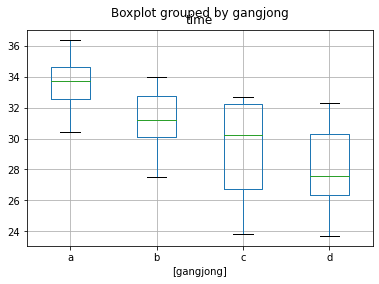

In [39]:
# 박스플롯
df.boxplot(by = 'gangjong');

In [62]:
f_result = stats.f_oneway(g1['time'], g2['time'], g3['time'], g4['time'])
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('One-way ANOVA')
print('F 검정통계량: {}'.format(f))
print('p-value: {}'.format(p))

One-way ANOVA
F 검정통계량: 4.172
p-value: 0.019


### 결과 해석
- 해당 문제 요건을 분석하면, __강종 그룹(a,b,c,d) 간의 2차정련 시간에 차이가 있는지를 검정__해야 한다.
- 따라서 __비교대상이 되는 두 개 이상의 집단들 간의 표본평균 차이를 검정하는 분석기법인 ANOVA 기법을 사용__한다.
    - __Cf.__ 카이제곱 검정은 자료가 빈도로 주어졌을 때, 특히 범주형 자료의 분석에 이용된다.
- 이때 __ANOVA 분석에서 그룹 내 변동이 크면 평균의 차이가 없는 것이며, 또한 그룹 간 변동이 크면 차이가 있는 것이다.__
- 이에 따라 가설 수립 및 검정 절차를 다음과 같이 정의한다.
    - __가설 수립__
        - __H0 귀무가설: 그룹 간 평균의 차이가 없다.__
        - __H1 대립가설: 적어도 하나의 그룹은 평균이 다르다.__
    - __유의수준 설정__
        - __α = 0.05__ (신뢰수준 0.95)
    - __검정통계량과 p-value 계산__
        - __검정통계량: 4.172__
        - __p-value: 0.019__
    - __결론__: p_value 값이 유의수준보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다.
        
### 종합 결론
- __즉, 적어도 하나의 그룹은 2차 정련에 걸리는 평균이 다르다는 결론을 도출할 수 있다.__ 그러나 이때 어떤 그룹이 차이를 보이는지는 검정통계량 값만으로는 알 수 없기 때문에, boxplot을 그려서 어떤 집단에서 차이가 있는지를 확인해보았다.
- boxplot 확인 결과, __a와 d 집단이 다른 집단과 평균의 차이__를 보인다.
    - __a의 경우 상대적으로 높은 표본평균 값__을 보인다.
    - __d의 경우 상대적으로 낮은 표본평균 값__을 보인다.

### Insight
- 철강의 청정도를 높이기 위해 2차 정련을 실시하는데, __a 그룹의 경우 다른 그룹에 비해 2차 정련에 들이는 시간이 많으므로 해당 그룹에서 생산된 철강의 청정도는 높을 것__이라 예상할 수 있다.
- 이에 따라 a 공정에서 생산되는 철강의 신뢰도가 다른 공정 그룹에서 생산되는 것보다 높을 것이라는 결론을 도출하였다.

In [26]:
# type 칼럼의 고유한 값 확인

df['type'].unique()

array(['a', 'b'], dtype=object)

In [52]:
# type에 따른 데이터프레임 분리

t1 = df[df['type'] == 'a']
t2 = df.loc[df['type'] == 'b']

In [53]:
# type a 데이터프레임 확인
t1

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a
5,34.9,F,a,a
6,33.1,A,b,a
7,29.9,B,b,a
8,31.7,C,b,a
9,27.5,D,b,a


In [54]:
# type b 데이터프레임 확인
t2

,time,charge,gangjong,type
12,32.6,A,c,b
13,32.7,B,c,b
14,29.3,C,c,b
15,25.9,D,c,b
16,31.1,E,c,b
17,23.8,F,c,b
18,26.7,A,d,b
19,28.5,B,d,b
20,30.9,C,d,b
21,26.2,D,d,b


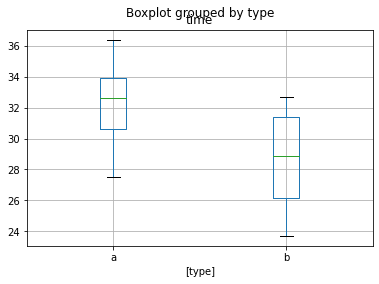

In [55]:
# boxplot

df.boxplot(by = 'type');

In [63]:
f_result = stats.f_oneway(t1['time'], t2['time'])
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('One-way ANOVA')
print('F 검정통계량: {}'.format(f))
print('p-value: {}'.format(p))

One-way ANOVA
F 검정통계량: 9.654
p-value: 0.005


### 결과 해석
- 해당 문제 요건을 분석하면, __type 그룹(a,b) 간의 2차정련 시간에 차이가 있는지를 검정__해야 한다.
- 따라서 __비교대상이 되는 두 개 이상의 집단들 간의 표본평균 차이를 검정하는 분석기법인 ANOVA 기법을 사용__한다.
    - __Cf.__ 카이제곱 검정은 자료가 빈도로 주어졌을 때, 특히 범주형 자료의 분석에 이용된다.
- 이때 __ANOVA 분석에서 그룹 내 변동이 크면 평균의 차이가 없는 것이며, 또한 그룹 간 변동이 크면 차이가 있는 것이다.__
- 이에 따라 가설 수립 및 검정 절차를 다음과 같이 정의한다.
    - __가설 수립__
        - __H0 귀무가설: 그룹 간 평균의 차이가 없다.__
        - __H1 대립가설: 적어도 하나의 그룹은 평균이 다르다.__
    - __유의수준 설정__
        - __α = 0.05__ (신뢰수준 0.95)
    - __검정통계량과 p-value 계산__
        - __검정통계량: 9.654__
        - __p-value: 0.005__
    - __결론__: p_value 값이 유의수준과 같으나, 대립가설을 채택하여 결과를 비교해 본다.
        
### 종합 결론
- __대립가설을 채택할 시, 적어도 하나의 그룹은 2차 정련에 걸리는 평균이 다르다는 결론을 도출할 수 있다.__ 그러나 이때 그룹이 평균에 있어 어떤 차이를 보이는지는 검정통계량 값만으로는 알 수 없기 때문에, boxplot을 그려서 집단의 차이를 확인해보았다.
- boxplot 확인 결과, __a와 b 집단이 다른 집단과 평균의 차이__를 보인다.
    - __a의 경우 상대적으로 높은 표본평균 값__을 보인다.
    - __b의 경우 상대적으로 낮은 표본평균 값__을 보인다.

### Insight
- 철강의 청정도를 높이기 위해 2차 정련을 실시하는데, __a 그룹의 경우 다른 그룹에 비해 2차 정련에 들이는 시간이 많으므로 해당 그룹에서 생산된 철강의 청정도는 높을 것__이라 예상할 수 있다.
- 이에 따라 a 타입에서 생산되는 철강의 신뢰도가 b 타입에서 생산되는 것보다 높을 것이라는 결론을 도출하였다.

------

## 실습 8 (상관분석)
### 추론 통계 (파이썬 코딩 및 결과 정리)
__초코칩의 강도와 재료 반죽온도 간에 관계를 분석하기 위한 상관분석을 하시오__

In [43]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39.0, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39.0, 36.9, 36.8, 37.6, 33.0, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15, 17, 14, 16, 20, 21]

In [71]:
# Correlation Analysis 실행
corr, pval = stats.pearsonr(df1, df2)

# Corelation, p-value 결과 출력
print('Correlation Analysis')
print('corr: {0:0.3f}'.format(corr))
print('p-value: {0:0.3f}'.format(pval))

Correlation Analysis
corr: -0.723
p-value: 0.000


### 결과 해석
- 해당 문제 요건을 분석하면, __초코칩의 강도와 재료 반죽온도 간의 관계를 검정__해야 한다.
- 따라서 __변수 간의 상호 영향력의 크기를 수리적으로 분석한 상관계수를 통해 상관분석을 실시__한다.
    - __Cf.__ 산점도를 통해 두 변수 간의 대략적 관계를 선행적으로 파악할 수도 있다.
- 이때 __상관계수란 두 변수 간 선형적 관계 정도와 방향을 수치로 표현한 지수로, -1에 가까울 수록 음의 상관관계, 1에 가까울 수록 양의 상관관계를 가진다.__
    - 그러나 두 변수 간 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다.
- 이에 따라 가설 수립 및 검정 절차를 다음과 같이 정의한다.
    - __가설 수립__
        - __H0 귀무가설: 변수 간 상관성이 없다.__
        - __H1 대립가설: 변수 간 상관성이 존재한다.__
    - __유의수준 설정__
        - __α = 0.05__ (신뢰수준 0.95)
    - __상관계수와 p-value 계산__
        - __corr: -0.723__
        - __p-value: 0.000__
    - __결론__: p_value 값이 유의수준 0.05보다 낮으므로, 대립가설을 채택한다.

### 종합 결론
- 즉, __초코칩 강도와 재료 반죽온도 간에는 상관성이 존재한다는 대립가설을 채택__한다.
- 이때 __상관계수를 보았을 때, 두 변수는 강한 음의 상관관계__를 보인다.

------

## 실습 9 (회귀분석)
### 추론 통계 (파이썬 코딩 및 결과 정리)
__초코칩의 강도와 굽는 시간과의 인과관계를 분석하기 위한 회귀분석 실시와 회귀식 도출__

In [77]:
# 필요 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf

In [73]:
df = pd.DataFrame({'Strength': [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1,35.9, 37.1,
                               36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5],
                  'Bakingtime': [0.798922, 0.84902, 0.816163, 0.758266, 0.815894, 0.807477,
                                0.809068, 0.7664, 0.742243, 0.751118, 0.740629, 0.751495, 0.738863, 0.827428, 
                                0.818172, 0.740939, 0.757128, 0.804695, 0.695121, 0.735377]})
df.head()

,Strength,Bakingtime
0,37.6,0.798922
1,38.6,0.849020
2,37.2,0.816163
3,36.4,0.758266
4,38.6,0.815894


In [79]:
# 요약 통계량 확인
df.describe().round(3)

,Strength,Bakingtime
count,20.000,20.000
mean,36.965,0.776
std,1.565,0.041
min,33.000,0.695
25%,36.375,0.742
50%,37.150,0.762
75%,37.725,0.811
max,39.000,0.849


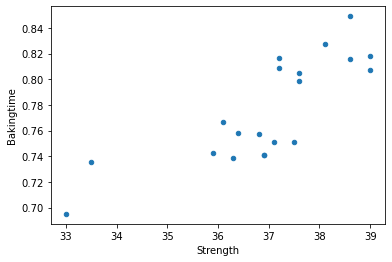

In [81]:
# 산점도 분석
df.plot.scatter(x = 'Strength', y = 'Bakingtime');

- 두 변수가 어느 정도는 양의 선형성을 가진다는 예측을 해볼 수 있다. 이를 정량적으로 검증하기 위해 상관계수를 계산해본다.

In [82]:
df.corr(method = 'pearson').round(3)

,Strength,Bakingtime
Strength,1.000,0.804
Bakingtime,0.804,1.000


- 두 변수의 상관계수는 0.804로, 아주 강한 양의 선형관계를 가지고 있음을 알 수 있다.

In [83]:
# 회귀 모델 생성

reg_model = smf.ols(formula = 'Strength ~ Bakingtime', data = df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Thu, 13 May 2021   Prob (F-statistic):           1.95e-05
Time:                        02:55:05   Log-Likelihood:                -26.431
No. Observations:                  20   AIC:                             56.86
Df Residuals:                      18   BIC:                             58.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0013      4.184      3.108      0.0

### 결과 해석
1. __모델의 유의성을 검정하기 위해 F 통계량을 확인__한다. 
    - 귀무가설: 회귀계수 = 0
    - 대립가설: 회귀계수는 0이 아니다
    - 유의수준: 0.05
    - __F 통계량의 p-value는 1.95e-05로 매우 낮은 값을 보인다. 즉, p-value가 유의수준보다 낮기 때문에 회귀계수는 0이 아니며, 해당 모델은 유의하다고 판단__한다.
2. __모델의 설명력을 확인하기 위해 결정계수 값을 확인__한다.
    - R^2 값은 0.646이다.
    - 결정계수는 0과 1에서 값이 형성되며, 1에 가까울 수록 모델의 설명력이 높다고 판단한다.
    - __값이 0.646으로 일정 부분 설명력이 있다는 결론을 도출__한다.
3. __회귀계수의 유의성을 검정하기 위해 t 검정을 실시__한다.
    - 귀무가설: 회귀계수 = 0
    - 대립가설: 회귀계수는 0이 아니다.
    - 유의수준: 0.05
    - __Bakingtime 회귀계수의 t 통계량의 p-value는 0.000으로 유의수준보다 낮은 값을 가진다. 즉, 회귀계수는 0이 아니다__.
    - 더불어 회귀계수 값이 30.8722으로, __x가 1단위 증가할 때마다 y가 +30.8722 증가한다는 의미__를 가진다. 즉, 매우 유의미한 회귀계수이다.

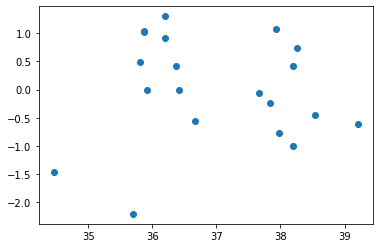

In [91]:
# 오차의 기본가정 검토
plt.scatter(reg_result.fittedvalues, reg_result.resid);

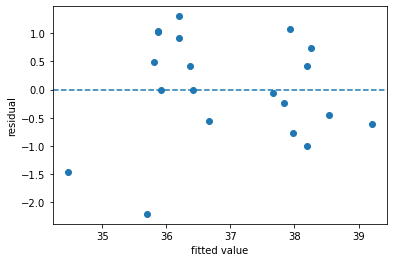

In [90]:
# 잔차의 등분산성

plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = '--');

### 결과해석
__분산이 깔때기 모양으로 나오지 않으며, 수평축을 중심으로 일정한 추세나 경향 없이 흩어진 모습이 랜덤하게 나타난다.__ 즉, 오차의 등분산성이 있다고 결론지을 수 있다.

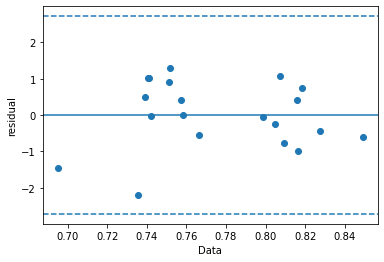

In [88]:
# 잔차의 독립성

plt.scatter(df["Bakingtime"], reg_result.resid, marker = 'o')
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3 * np.std(reg_result.resid), linestyle = "--")
plt.axhline(y = -3 * np.std(reg_result.resid), linestyle = "--");

### 결과해석
__가로축의 변화에 따라 일정한 양상을 보이지 않는다. 즉, 오차는 서로 독립적이다.__

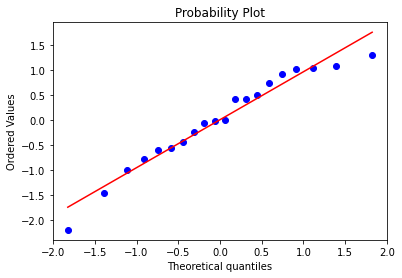

In [89]:
# 잔차의 정규성

stats.probplot(reg_result.resid, plot=plt)
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis = 0);

### 결과해석
__잔차가 정규분포 직선(적색 선)을 중심으로 분포하고, 검정 통계량이 귀무가설을 채택하므로 잔차가 정규분포를 따른다고 할 수 있다.__

### 종합결론
#### 최종 회귀식
__y = 13.0013 + 30.8722 * Strength__
- 강도가 1단위 증가할 때마다 Bakingtime은 30.8722 만큼 증가한다.